In [1]:
# faceMask hDDM face ratings analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 12/07/20

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from patsy import dmatrix

import hddm
print(hddm.__version__) # should be 0.6.0

1.11.3
0.6.0


C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
# load hDDM-processed data from CSV file into a NumPy structured array
data = hddm.load_csv('faceMask_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data = hddm.utils.flip_errors(data)

# check dataset
data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,gc2le9xecjp1stz,0,3,angry,0,_faces/22_F_R_U.jpg,22_F_R_U,22,F,surprised,upper,0,-4.636150,0,0,0,0,0,50
1,gc2le9xecjp1stz,0,3,angry,1,_faces/07_M_H_L.jpg,07_M_H_L,7,M,happy,lower,0,-2.079460,0,0,0,50,0,0
2,gc2le9xecjp1stz,0,3,angry,2,_faces/46_M_R_X.jpg,46_M_R_X,46,M,surprised,baseline,0,-1.847670,0,0,0,0,0,100
3,gc2le9xecjp1stz,0,3,angry,3,_faces/47_M_S_L.jpg,47_M_S_L,47,M,sad,lower,0,-6.506275,0,0,0,0,50,0
4,gc2le9xecjp1stz,0,3,angry,4,_faces/25_M_R_X.jpg,25_M_R_X,25,M,surprised,baseline,0,-1.536780,0,0,0,0,0,100
5,gc2le9xecjp1stz,0,3,angry,5,_faces/27_F_A_U.jpg,27_F_A_U,27,F,angry,upper,1,1.906175,50,0,0,0,0,0
6,gc2le9xecjp1stz,0,3,angry,6,_faces/08_F_S_U.jpg,08_F_S_U,8,F,sad,upper,0,-2.182530,0,0,0,0,50,0
7,gc2le9xecjp1stz,0,3,angry,7,_faces/38_M_H_X.jpg,38_M_H_X,38,M,happy,baseline,0,-1.445230,0,0,0,100,0,0
8,gc2le9xecjp1stz,0,3,angry,8,_faces/30_M_A_U.jpg,30_M_A_U,30,M,angry,upper,1,1.405270,50,0,0,0,0,0
9,gc2le9xecjp1stz,0,3,angry,9,_faces/04_F_R_U.jpg,04_F_R_U,4,F,surprised,upper,0,-1.945385,0,0,0,0,0,50


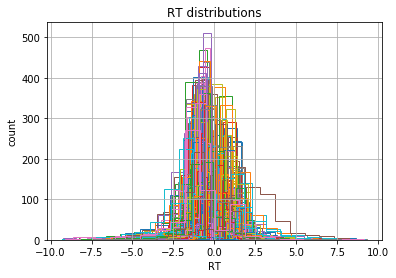

In [3]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [4]:
# subset dataset by emotion rating type (disgusted) and facial expression (angry)
da_data = data.loc[(data['emotionRating'] == 'disgusted') & (data['expression'] == 'angry')]
da_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
430,gc2le9xecjp1stz,4,5,disgusted,435,_faces/09_M_A_X.jpg,09_M_A_X,9,M,angry,baseline,1,1.339960,100,0,0,0,0,0
439,gc2le9xecjp1stz,4,5,disgusted,444,_faces/04_F_A_X.jpg,04_F_A_X,4,F,angry,baseline,1,1.623590,100,0,0,0,0,0
440,gc2le9xecjp1stz,4,5,disgusted,445,_faces/09_M_A_L.jpg,09_M_A_L,9,M,angry,lower,1,1.328425,50,0,0,0,0,0
443,gc2le9xecjp1stz,4,5,disgusted,448,_faces/25_M_A_X.jpg,25_M_A_X,25,M,angry,baseline,1,1.257255,100,0,0,0,0,0
445,gc2le9xecjp1stz,4,5,disgusted,450,_faces/09_M_A_U.jpg,09_M_A_U,9,M,angry,upper,1,0.912270,50,0,0,0,0,0
447,gc2le9xecjp1stz,4,5,disgusted,452,_faces/22_F_A_X.jpg,22_F_A_X,22,F,angry,baseline,0,-1.396405,100,0,0,0,0,0
449,gc2le9xecjp1stz,4,5,disgusted,454,_faces/46_M_A_X.jpg,46_M_A_X,46,M,angry,baseline,0,-1.012685,100,0,0,0,0,0
450,gc2le9xecjp1stz,4,5,disgusted,455,_faces/25_M_A_L.jpg,25_M_A_L,25,M,angry,lower,1,1.085350,50,0,0,0,0,0
455,gc2le9xecjp1stz,4,5,disgusted,460,_faces/46_M_A_L.jpg,46_M_A_L,46,M,angry,lower,0,-0.647740,50,0,0,0,0,0
460,gc2le9xecjp1stz,4,5,disgusted,465,_faces/56_F_A_L.jpg,56_F_A_L,56,F,angry,lower,0,-0.634720,50,0,0,0,0,0


In [5]:
# drop any subjects missing columns in design matrix (otherwise produces error)
da_data = da_data[(da_data.subj_idx != 'ygpcur698h4dcw5') & (da_data.subj_idx != 'uxxvr83zy4jzwls') & (da_data.subj_idx != 'rc7s6vgpycw73ap')]

In [6]:
# define model
m_da = hddm.HDDMRegressor(da_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 32962.5 sec

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                       mean         std        2.5q          25q        50q         75q       97.5q       mc err
a                                   1.82696   0.0440738      1.7421      1.79699    1.82585     1.85665     1.91679   0.00124804
a_std                              0.549604   0.0379043    0.477913     0.523142   0.548528    0.574145    0.626637    0.0012149
a_subj.02hcv424u29nd5w              1.86038    0.264159     1.41861      1.67344    1.83282     2.01607     2.45638   0.00653945
a_subj.02k2uwlhgxnumn9               1.7986    0.286521     1.32866      1.59382    1.76261     1.97023     2.44891   0.00749405
a_subj.03g7h2hzq4o3g26              2.78046    0.434009     2.06605      2.47106    2.72954     3.03384      3.7436    0.0125998
a_subj.0nmr75cysk1ae0e              2.61603    0.373709     1.98889      2.35516    2.57544     2.83954      3.4564    0.0085035
a_subj.0t8qp67pqkw36cb              2.49133    0.373614     1.88094      2.22757    2.45262     2

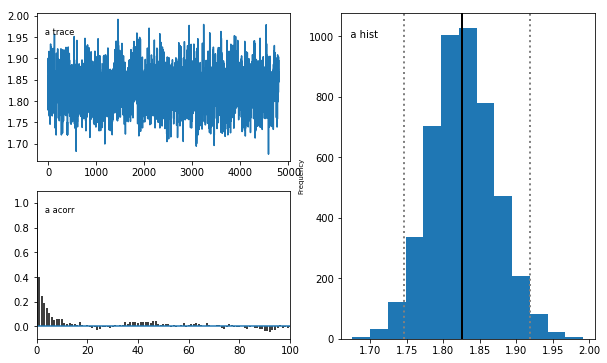

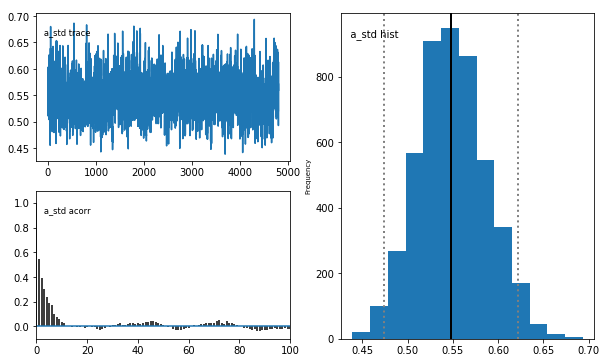

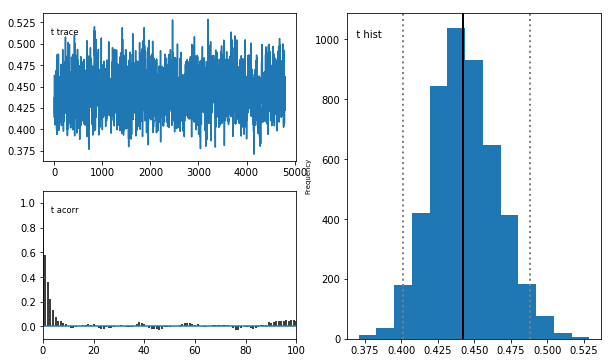

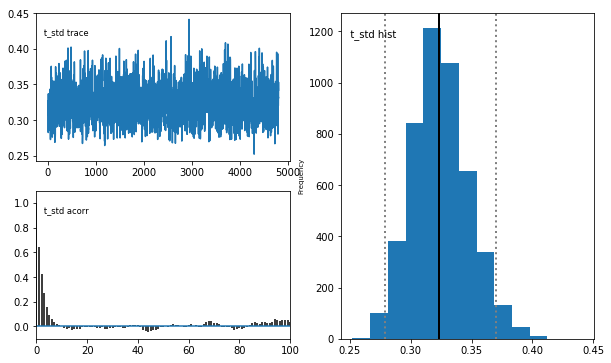

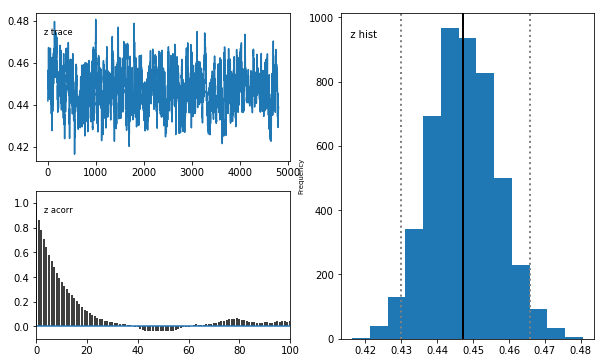

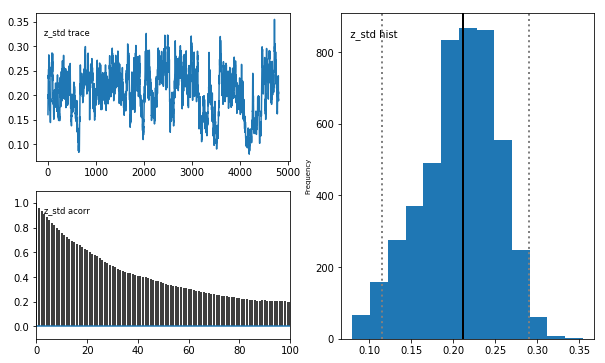

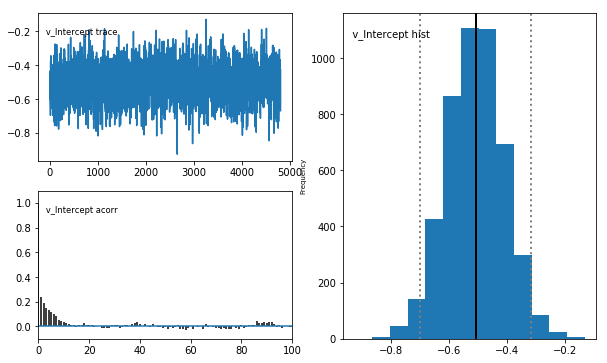

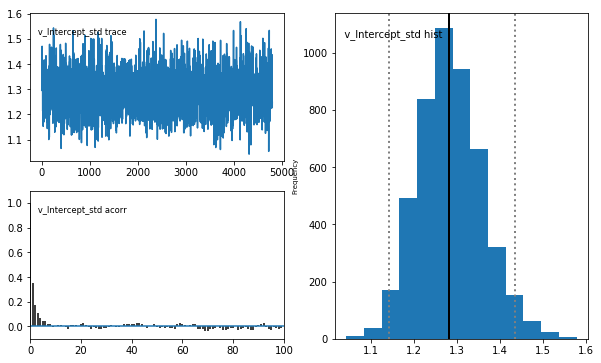

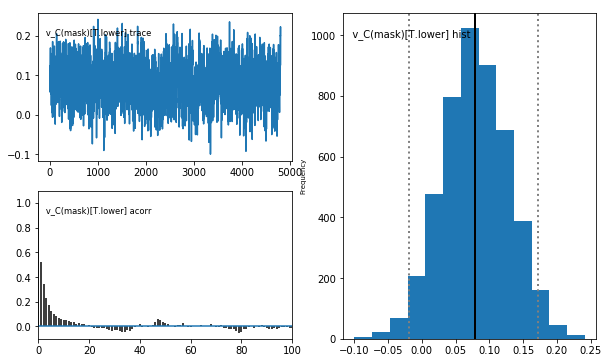

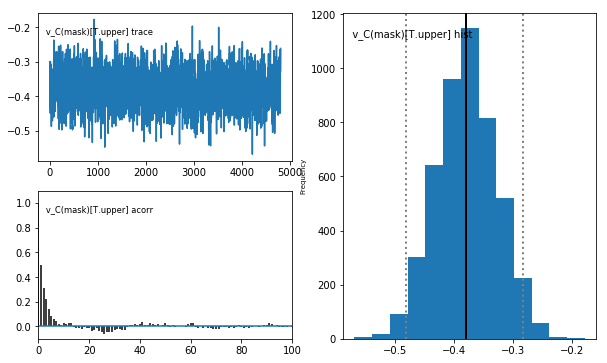

In [7]:
# run model
m_da.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_da.print_stats()
m_da.plot_posteriors()

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                       mean        std       2.5q  \
a                                   1.82696  0.0440738     1.7421   
a_std                              0.549604  0.0379043   0.477913   
a_subj.02hcv424u29nd5w              1.86038   0.264159    1.41861   
a_subj.02k2uwlhgxnumn9               1.7986   0.286521    1.32866   
a_subj.03g7h2hzq4o3g26              2.78046   0.434009    2.06605   
a_subj.0nmr75cysk1ae0e              2.61603   0.373709    1.98889   
a_subj.0t8qp67pqkw36cb              2.49133   0.373614    1.88094   
a_subj.0vfpn4uf3t031qu              2.01077   0.438778    1.32138   
a_subj.11dsfdtym1yy5mx              1.64811    0.19289    1.31183   
a_subj.1d3dadyu4ekqb4q              1.27426   0.150524    1.01474   
a_subj.1mt2emp4645cbl1               2.0461   0.261478    1.60551   
a_subj.1rst24mbtgy9rc8              1.86603   0.201089    1.51059   
a_subj.1sala6c9yc2bm1w              2.21283   0.241674    1.79141   
a_subj.1tcnxbt2pz7t2gx            

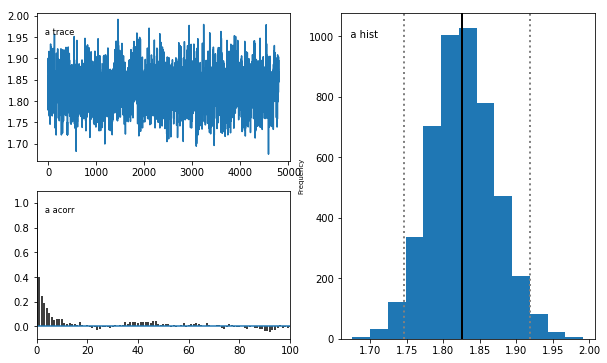

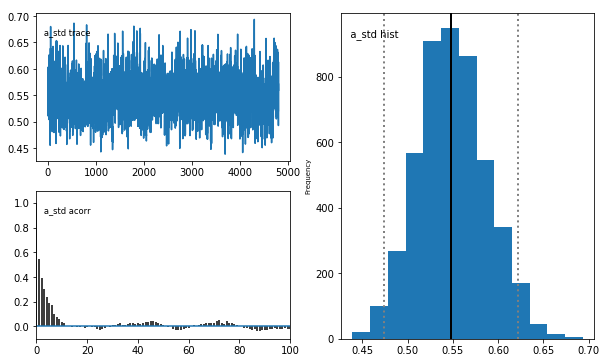

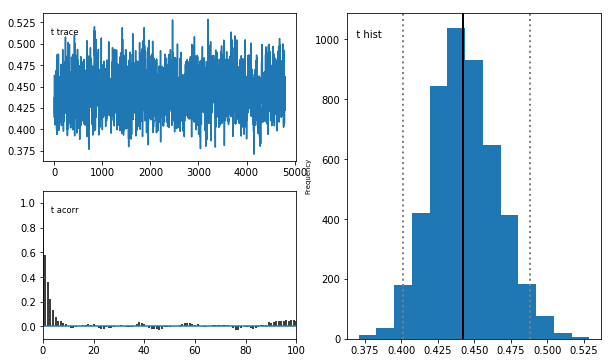

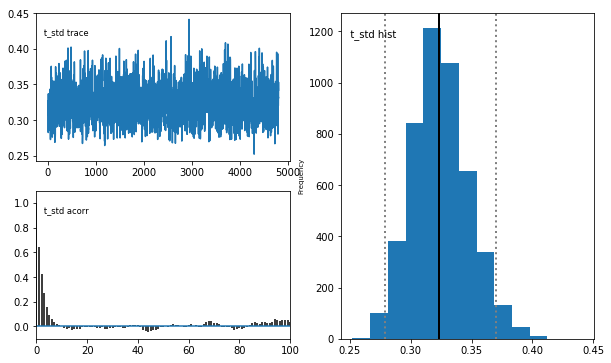

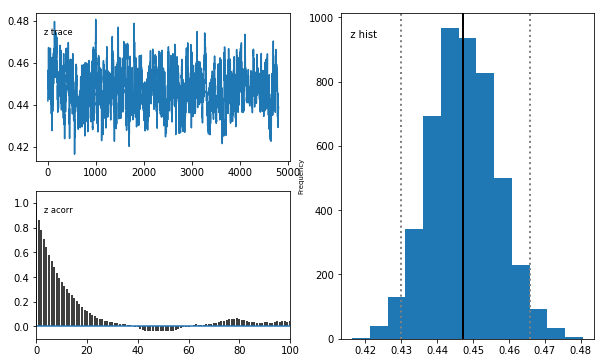

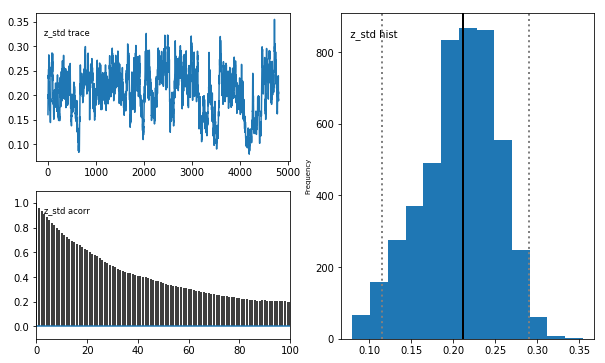

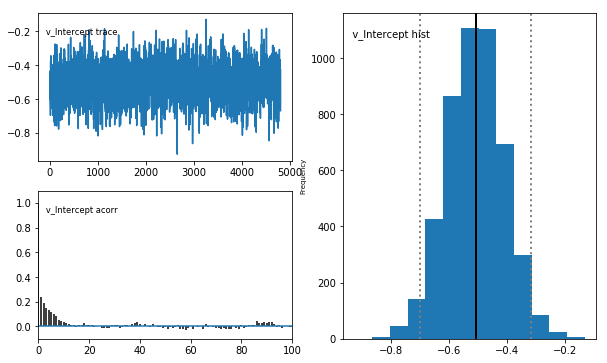

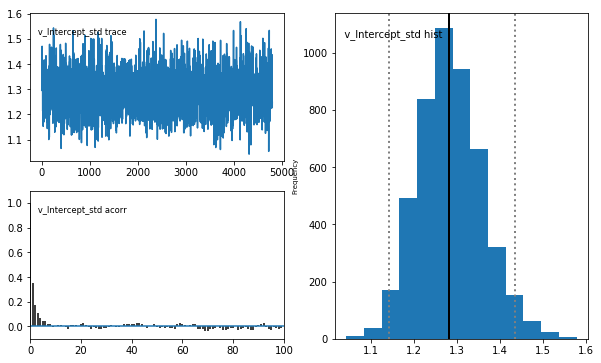

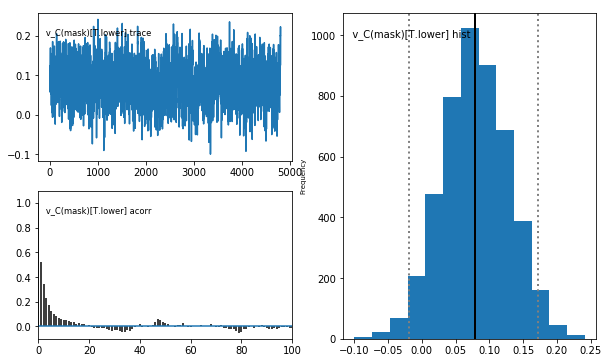

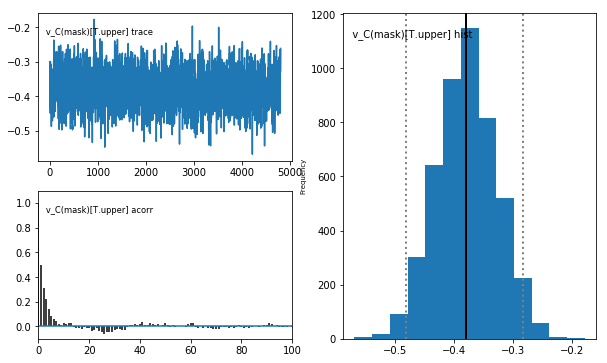

In [8]:
# save model stats
da_stats = m_da.gen_stats()
print(da_stats)
da_stats.to_csv('_maskFalsePositives/da_5000/faceMask_hddm_drift_maskFalsePositives_da_5000.csv', index=True)

# save model posterior plots
m_da.plot_posteriors(path='_maskFalsePositives/da_5000/_posteriors', save=True)

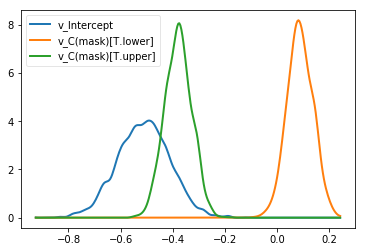

In [9]:
# plot model posteriors by mask
da_v_none, da_v_lower, da_v_upper = m_da.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([da_v_none, da_v_lower, da_v_upper])
plt.savefig('_maskFalsePositives/da_5000/faceMask_hddm_drift_maskFalsePositives_da_5000_v_mask.pdf')

In [10]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(da_v_none > 0) = ", (da_v_none.trace() > 0).mean())
print("P(da_v_lower < 0) = ", (da_v_lower.trace() < 0).mean())
print("P(da_v_upper > 0) = ", (da_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(da_v_lower < ad_v_upper) = ", (da_v_lower.trace() < da_v_upper.trace()).mean())

P(da_v_none > 0) =  0.0
P(da_v_lower < 0) =  0.0516666666667
P(da_v_upper > 0) =  0.0
P(da_v_lower < ad_v_upper) =  0.0


In [11]:
# subset dataset by emotion rating type (disgusted) and facial expression (fearful)
df_data = data.loc[(data['emotionRating'] == 'disgusted') & (data['expression'] == 'fearful')]
df_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
427,gc2le9xecjp1stz,4,5,disgusted,432,_faces/49_M_F_U.jpg,49_M_F_U,49,M,fearful,upper,0,-1.519920,0,0,50,0,0,0
436,gc2le9xecjp1stz,4,5,disgusted,441,_faces/15_M_F_U.jpg,15_M_F_U,15,M,fearful,upper,0,-1.462640,0,0,50,0,0,0
451,gc2le9xecjp1stz,4,5,disgusted,456,_faces/58_F_F_X.jpg,58_F_F_X,58,F,fearful,baseline,0,-0.645020,0,0,100,0,0,0
452,gc2le9xecjp1stz,4,5,disgusted,457,_faces/15_M_F_X.jpg,15_M_F_X,15,M,fearful,baseline,0,-0.926530,0,0,100,0,0,0
457,gc2le9xecjp1stz,4,5,disgusted,462,_faces/12_F_F_U.jpg,12_F_F_U,12,F,fearful,upper,0,-0.916920,0,0,50,0,0,0
465,gc2le9xecjp1stz,4,5,disgusted,470,_faces/15_M_F_L.jpg,15_M_F_L,15,M,fearful,lower,1,0.580380,0,0,50,0,0,0
467,gc2le9xecjp1stz,4,5,disgusted,472,_faces/27_F_F_X.jpg,27_F_F_X,27,F,fearful,baseline,0,-0.465920,0,0,100,0,0,0
470,gc2le9xecjp1stz,4,5,disgusted,475,_faces/49_M_F_X.jpg,49_M_F_X,49,M,fearful,baseline,1,0.310445,0,0,100,0,0,0
479,gc2le9xecjp1stz,4,5,disgusted,484,_faces/27_F_F_U.jpg,27_F_F_U,27,F,fearful,upper,1,0.180690,0,0,50,0,0,0
480,gc2le9xecjp1stz,4,5,disgusted,485,_faces/49_M_F_L.jpg,49_M_F_L,49,M,fearful,lower,0,-0.645575,0,0,50,0,0,0


In [12]:
# drop any subjects missing columns in design matrix (otherwise produces error)
# none in df

In [13]:
# define model
m_df = hddm.HDDMRegressor(df_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 32834.5 sec

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                        mean         std        2.5q          25q         50q         75q       97.5q       mc err
a                                    1.76789   0.0422971     1.68667      1.73911     1.76718     1.79643      1.8528   0.00103167
a_std                               0.549502   0.0363812    0.482521     0.525455    0.548071    0.572387    0.624875   0.00108988
a_subj.02hcv424u29nd5w               2.64644    0.346236      2.0581      2.40084     2.61564     2.86264     3.41628   0.00804977
a_subj.02k2uwlhgxnumn9               1.56609    0.210976     1.21081      1.41506     1.54582     1.69687     2.04215   0.00545686
a_subj.03g7h2hzq4o3g26               2.45771    0.272859     1.98351      2.26396     2.44074      2.6278     3.03757   0.00590005
a_subj.0nmr75cysk1ae0e               2.46915    0.335228     1.89418      2.23085     2.44318     2.68053     3.18461   0.00984644
a_subj.0t8qp67pqkw36cb               2.50365    0.292997     1.99637      2.29592  

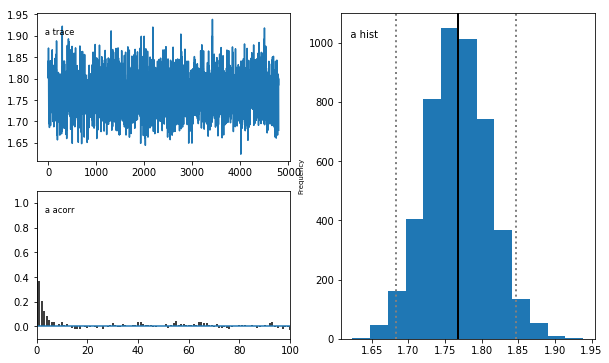

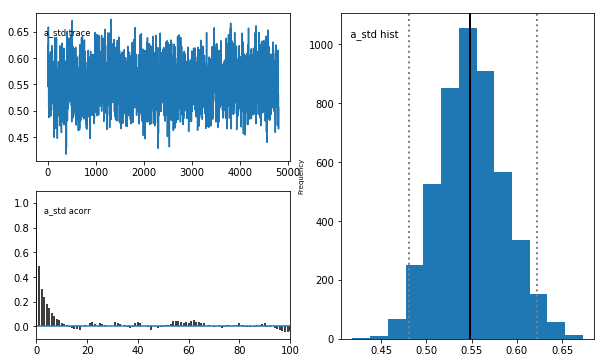

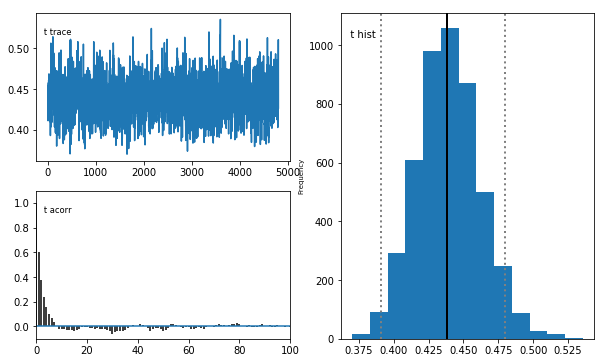

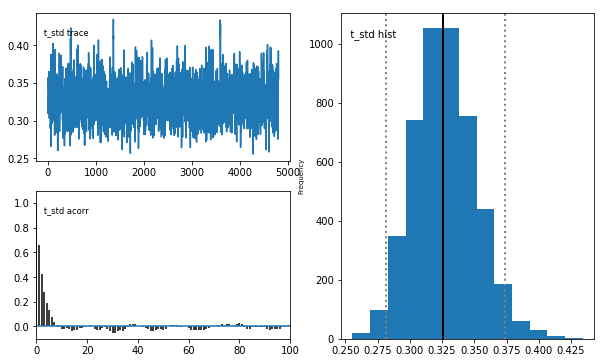

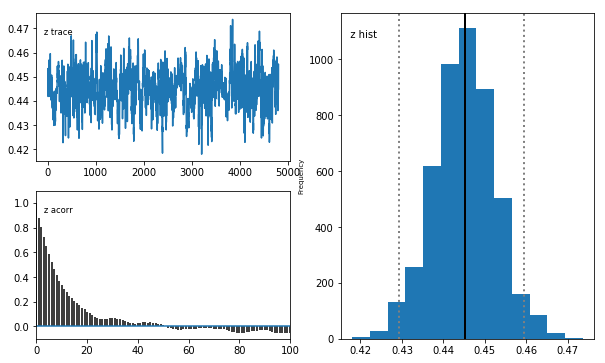

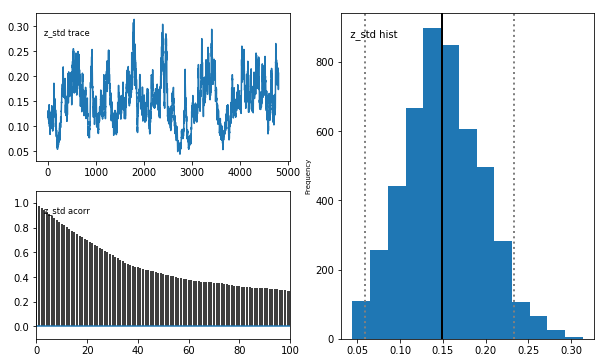

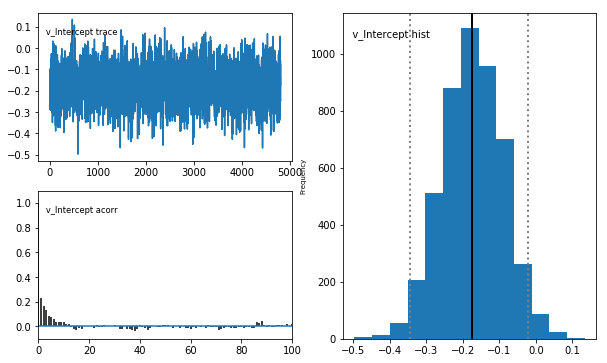

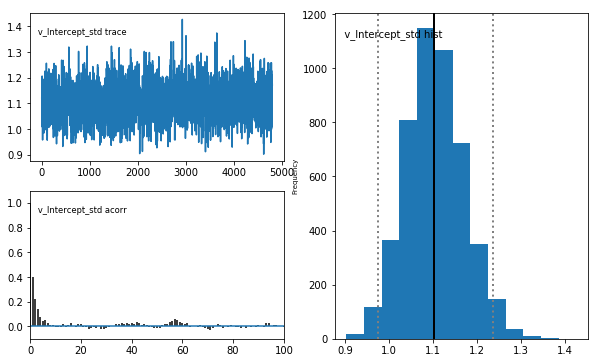

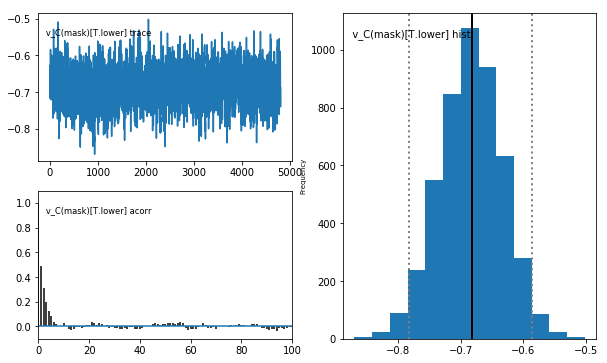

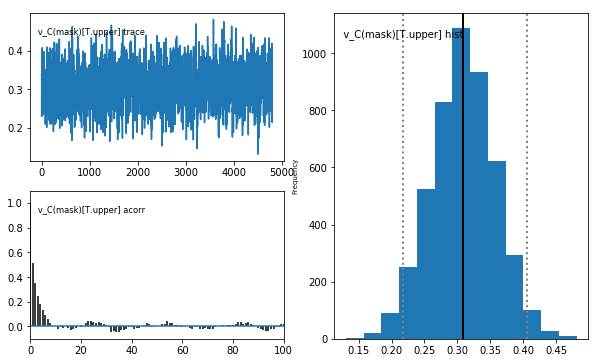

In [14]:
# run model
m_df.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_df.print_stats()
m_df.plot_posteriors()

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                       mean        std       2.5q        25q  \
a                                   1.76789  0.0422971    1.68667    1.73911   
a_std                              0.549502  0.0363812   0.482521   0.525455   
a_subj.02hcv424u29nd5w              2.64644   0.346236     2.0581    2.40084   
a_subj.02k2uwlhgxnumn9              1.56609   0.210976    1.21081    1.41506   
a_subj.03g7h2hzq4o3g26              2.45771   0.272859    1.98351    2.26396   
a_subj.0nmr75cysk1ae0e              2.46915   0.335228    1.89418    2.23085   
a_subj.0t8qp67pqkw36cb              2.50365   0.292997    1.99637    2.29592   
a_subj.0vfpn4uf3t031qu              1.19523   0.158319   0.920407    1.08321   
a_subj.11dsfdtym1yy5mx              1.54473   0.178725    1.23841    1.41852   
a_subj.1d3dadyu4ekqb4q              1.39344   0.176196      1.099    1.26785   
a_subj.1mt2emp4645cbl1              2.11127    0.23446    1.70596    1.94572   
a_subj.1rst24mbtgy9rc8              1.51

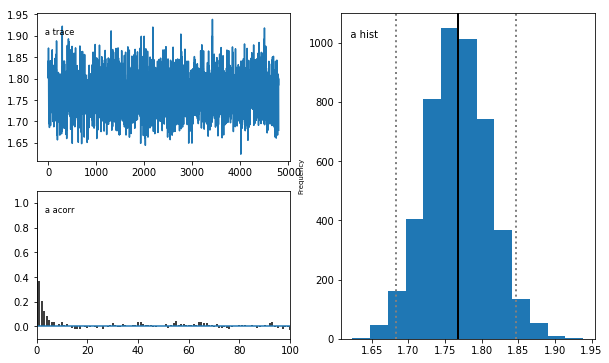

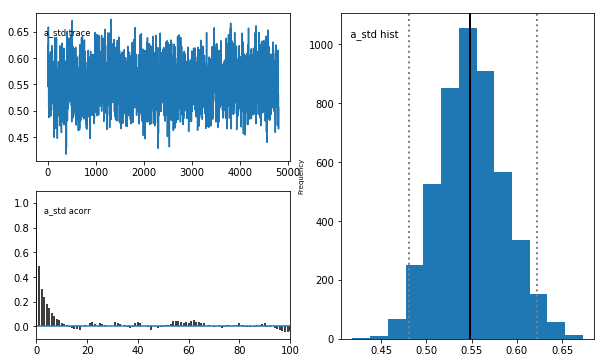

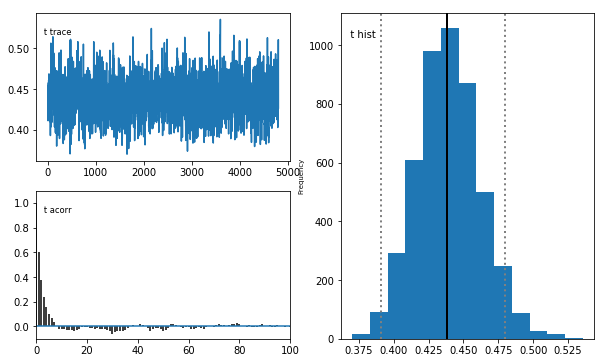

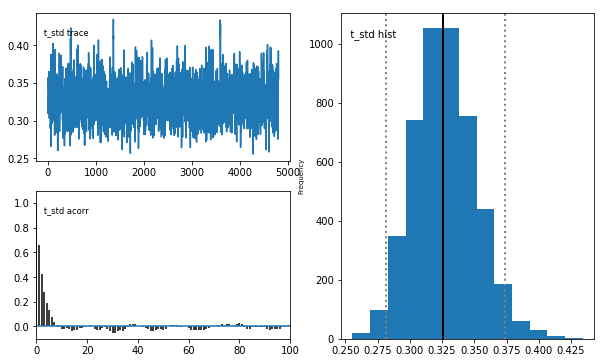

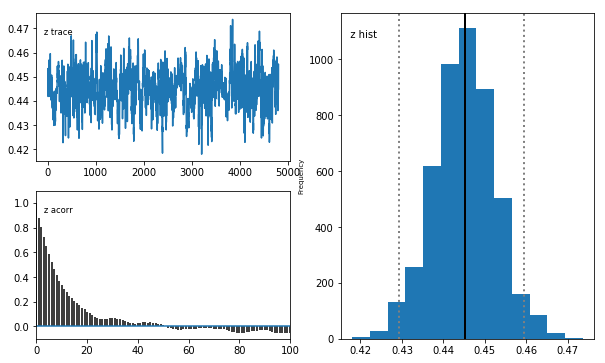

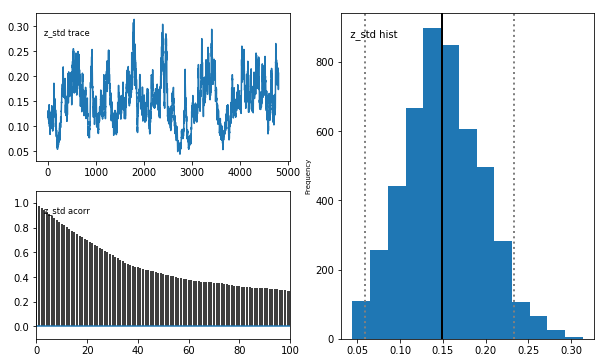

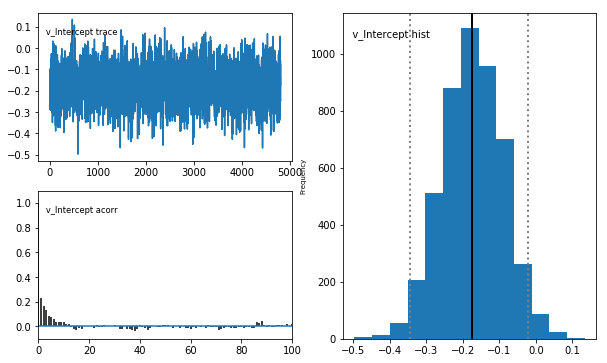

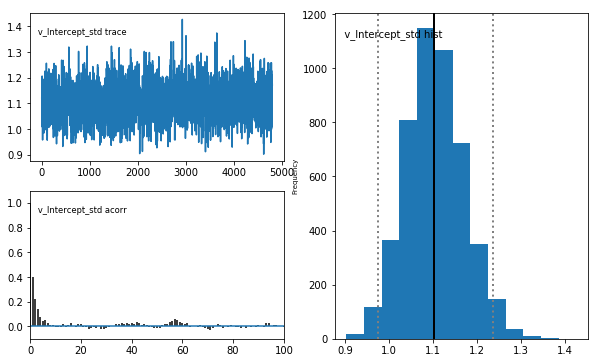

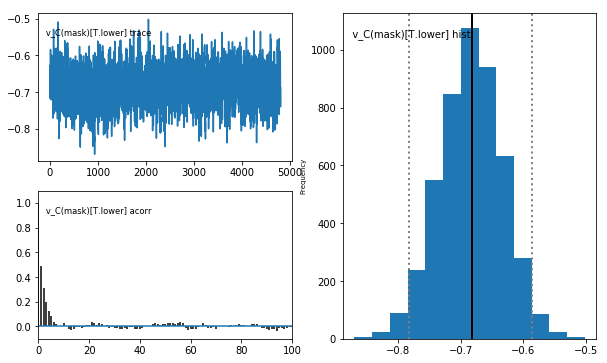

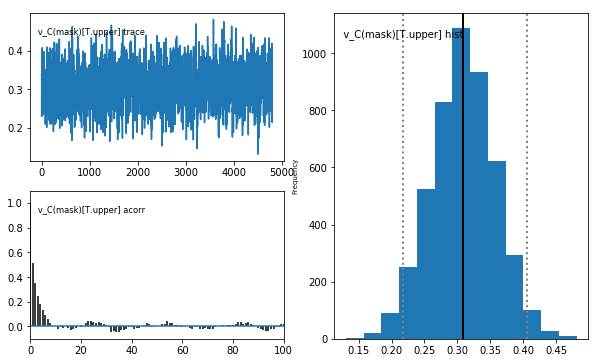

In [15]:
# save model stats
df_stats = m_df.gen_stats()
print(df_stats)
df_stats.to_csv('_maskFalsePositives/df_5000/faceMask_hddm_drift_maskFalsePositives_df_5000.csv', index=True)

# save model posterior plots
m_df.plot_posteriors(path='_maskFalsePositives/df_5000/_posteriors', save=True)

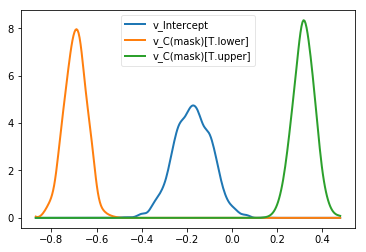

In [16]:
# plot model posteriors by mask
df_v_none, df_v_lower, df_v_upper = m_df.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([df_v_none, df_v_lower, df_v_upper])
plt.savefig('_maskFalsePositives/df_5000/faceMask_hddm_drift_maskFalsePositives_df_5000_v_mask.pdf')

In [18]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(df_v_none > 0) = ", (df_v_none.trace() > 0).mean())
print("P(df_v_lower > 0) = ", (df_v_lower.trace() > 0).mean())
print("P(df_v_upper < 0) = ", (df_v_upper.trace() < 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(df_v_lower > af_v_upper) = ", (df_v_lower.trace() > df_v_upper.trace()).mean())

P(df_v_none > 0) =  0.0172916666667
P(df_v_lower > 0) =  0.0
P(df_v_upper < 0) =  0.0
P(df_v_lower > af_v_upper) =  0.0
